Sprint 8.1:

Make the connection in Python with MySQL Workbench to load all the information you have in the tables.

You will create a visualization for each exercise. Comment on what catches your attention about graphing this variable, justify the choice of graph, and interpret the results based on your data.




In [47]:
# #Preparar las tablas de dataset:
# import pymysql
# import pandas as pd
# import matplotlib.pyplot as plt
        # import seaborn as sn

# # conectar a MYSQL
# conn = pymysql.connect(
#     host="localhost",
#     user="root",
#     password="F11091370m",
#     database="star_schema_db"
# )

# cursor = conn.cursor()

# # Coger una lista de las tablas
# cursor.execute("SHOW TABLES")
# tables = [table[0] for table in cursor.fetchall()]

# # leer los datos de cada tabla y guardar en el diccionario
# data = {}
# for table in tables:
#     cursor.execute(f"SELECT * FROM {table}")
#     rows = cursor.fetchall()  # obtener los datos
#     data[table] = rows  #guardar los datos
   

# # cerrar la coneccion
# cursor.close()
# conn.close()

# # mostrar info de las tablas
# for table, rows in data.items():
#     print(f"✅ Table: {table}, Rows: {len(rows)}")




In [48]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = pymysql.connect(host='localhost', user='root', passwd='F11091370m', db= "star_schema_db")
cursor = conn.cursor()
cursor.execute("SHOW TABLES")
tablas = cursor.fetchall()

data = {}

for tabla in tablas:
    nombre_tabla = tabla[0]
    datos = pd.read_sql_query(f'SELECT * FROM {nombre_tabla}', conn)
    data[nombre_tabla] = datos
    print(f'Tabla {nombre_tabla} cargada.')
    
#para quitar $ en la columna de price
# data["products"]["price"] = data["products"]["price"].astype(str).str.replace(r"[$,]", "", regex=True).astype(float)

Tabla companies cargada.
Tabla credit_cards cargada.
Tabla products cargada.
Tabla transactions cargada.
Tabla users cargada.


C:\Users\CanteMosh\AppData\Local\Temp\ipykernel_4176\2212161436.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  datos = pd.read_sql_query(f'SELECT * FROM {nombre_tabla}', conn)


In [49]:
data["transactions"]


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420


Crear una nueva columna con product ids separados

In [50]:

#1-1: crear una lista de product_ids 

df_transactions = data["transactions"].copy()
df_transactions["product_ids"] = df_transactions["product_ids"].str.split(",")

#calcular len de cada lista de product_ids
df_transactions["num_products"] = df_transactions["product_ids"].apply(len)

#romper la columna de product_ids a diferentes filas
df_transactions = df_transactions.explode("product_ids")

# calcular "amount" de cada id usando (amount/len)
df_transactions["amount"] = df_transactions["amount"] / df_transactions["num_products"]

# # تبدیل `products_id` و `id` به نوع `str` برای سازگاری در `merge`

df_transactions["product_ids"] = df_transactions["product_ids"].astype(str)
data["products"]["id"] = data["products"]["id"].astype(str)

# Merge:
df_merged = df_transactions.merge(data["products"], left_on="product_ids", right_on="id", suffixes=('_transaction', '_product'))

# Mostrar el resultado
print(df_merged)

                           id_transaction   card_id business_id  \
0    02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1    0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2    063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3    0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4    06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   
..                                    ...       ...         ...   
582  FD2E8957-414B-BEEC-E9AD-59AA7A8A6290  CcU-3232      b-2390   
583  FD89D51B-AE8D-77DC-E450-B8083FBD3187  CcU-3960      b-2494   
584  FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65  CcU-4331      b-2302   
585  FE809ED4-2DB6-55AC-C915-929516E4646B  CcU-4849      b-2302   
586  FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  CcU-2945      b-2226   

              timestamp      amount  declined product_ids  user_id       lat  \
0   2021-08-28 23:42:24  155.640000         0          71       92  81.91850   
1   2021-07-26 07:29:18   16.510000

In [51]:

##usando dataframe:

# products_df=data['products']
# products_df=pd.DataFrame(products_df)
# products_df.info()

- Exercise 1
A numeric variable.

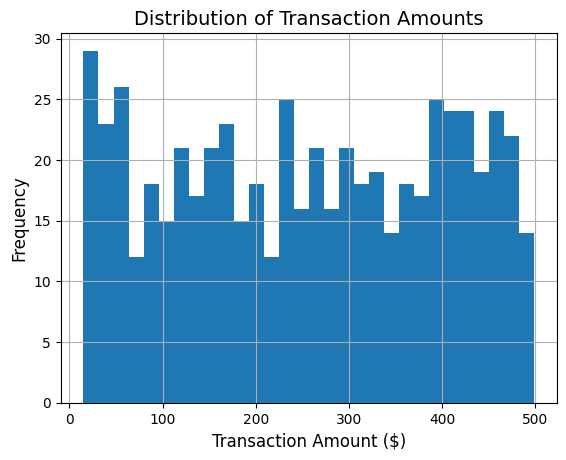

In [52]:
#CON PANDAS:
# 1. یک داده عددی: نمایش توزیع مقدار تراکنش‌ها
# df= data["transactions"]
# print("🔹 خلاصه آماری مقدار تراکنش:")
# print(data['transactions']["amount"].describe())
# print("********************************************") 

# para quitar el error de $ en la columna de amount
data["transactions"]["amount"].apply(pd.to_numeric, errors="coerce").plot(kind="hist", bins=30)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

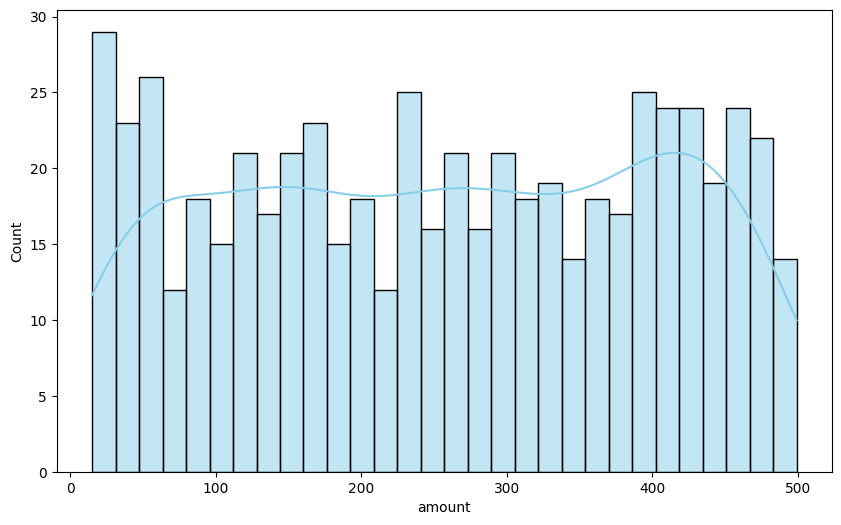

In [53]:
#CON SEABORN:
# رسم هیستوگرام برای ستون `amount` با استفاده از seaborn
plt.figure(figsize=(10, 6))  # تنظیم اندازه نمودار
sns.histplot(transactions['amount'], bins=30, kde=True, color='skyblue', edgecolor='black')

# # تنظیمات نمودار
# plt.title('Distribution of Transaction Amounts', fontsize=14)
# plt.xlabel('Transaction Amount ($)', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(True)

# نمایش نمودار
plt.show()

In [54]:
transactions

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420


Level 1- E2:Two numerical variables:
1-1: amount & lat
1-2: price & weight
1-3:amount & price

          amount       lat
amount  1.000000  0.078116
lat     0.078116  1.000000
******************************


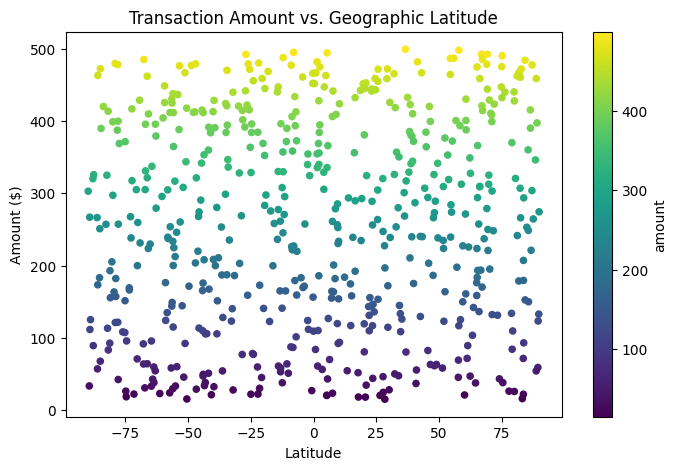

***********************************************


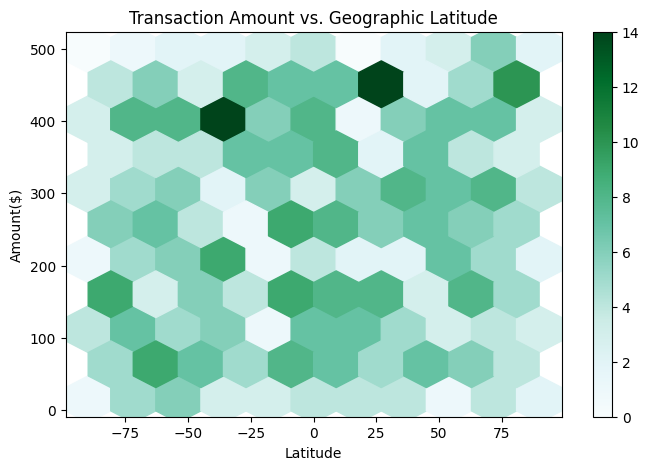

In [55]:
#2-1:amount & lat
##dos numericos sin grafico (CORRELATION)
df=data["transactions"]
print(df[['amount', 'lat']].apply(pd.to_numeric, errors="coerce").corr())

print("*"* 30)

#dos numericos con grafico
df.plot(kind="scatter", x="lat", y="amount",c="amount", title="Transaction Amount vs. Geographic Latitude", figsize=(8, 5))
plt.xlabel("Latitude")
plt.ylabel("Amount ($)")
plt.show()

print("***********************************************")
#para mostrar los datos mas limpios
df[['amount', 'lat']].apply(pd.to_numeric, errors='coerce').plot(kind="hexbin", x="lat", y="amount",  gridsize=10, title="Transaction Amount vs. Geographic Latitude", figsize=(8, 5))
plt.xlabel("Latitude")
plt.ylabel("Amount($)")
plt.show()


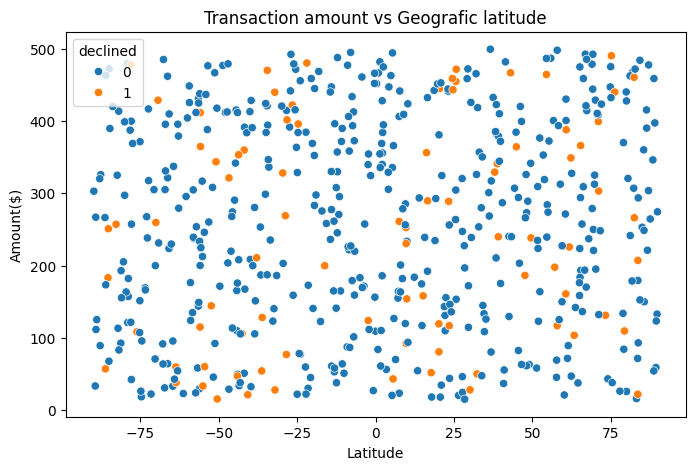

In [56]:
#2-1 con seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["transactions"]["lat"], y=data["transactions"]["amount"],hue=data["transactions"]["declined"])#, alpha=0.9, palette="coolwarm")
plt.title("Transaction amount vs Geografic latitude")
plt.xlabel("Latitude")
plt.ylabel("Amount($)")
plt.show()


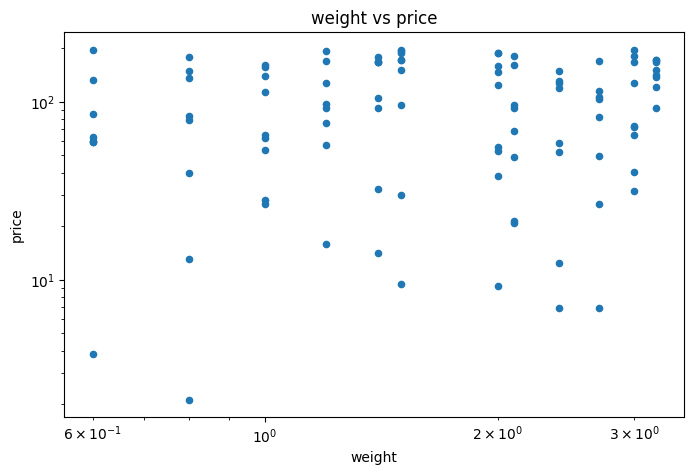

In [62]:
#2-2: price & weight

data["products"]["price"]=data["products"]["price"].astype(str).str.replace(r"[$,]", "", regex=True).astype(float)

data["products"][["price","weight"]].corr() #da value error

#para resolver el valueError
# print(data["products"].dtypes)  # بررسی نوع داده‌ها> داده ها آبجکت یا غیر عددی هستند
# print(data["products"].head())  # نمایش چند سطر اول

# print(data["products"][['price']].apply(pd.to_numeric, errors="coerce").corr())
# print(data["products"][['price', 'weight']].corr())


data["products"].plot(kind="scatter", x="weight", y="price", title="weight vs price", figsize=(8, 5))
plt.xlabel("weight")
plt.ylabel('price')
plt.yscale('log')
#plt.xticks(rotation=45)
plt.xscale('log')

plt.show()

******************************


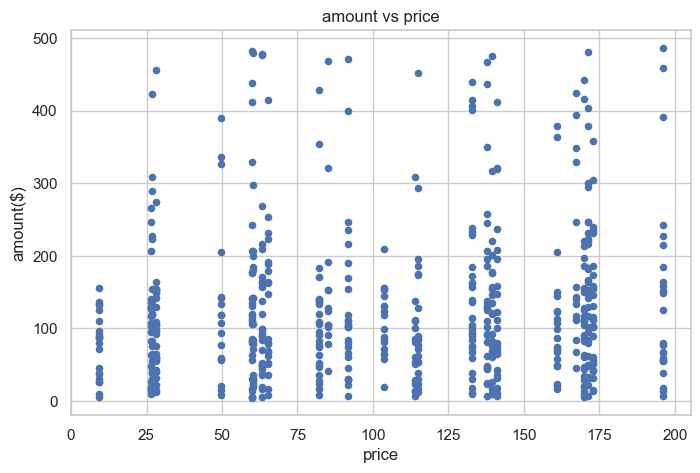

In [ ]:
#2-3. amount vs price
df_transactions["product_ids"] = df_transactions["product_ids"].astype(str)
data["products"]["id"] = data["products"]["id"].astype(str)

# Merge:
df_merged = df_transactions.merge(data["products"], left_on="product_ids", right_on="id", suffixes=('_transaction', '_product'))


print("*" *30)

# df_merged[["price","amount"]].corr()

df_merged.plot(kind="scatter", x="price", y="amount", title="amount vs price", figsize=(8, 5))
plt.xlabel("price")
plt.ylabel("amount($)")
plt.show()

Level1- E3:A categorical variable. 

Level 1- E4:A categorical variable and a numeric one.

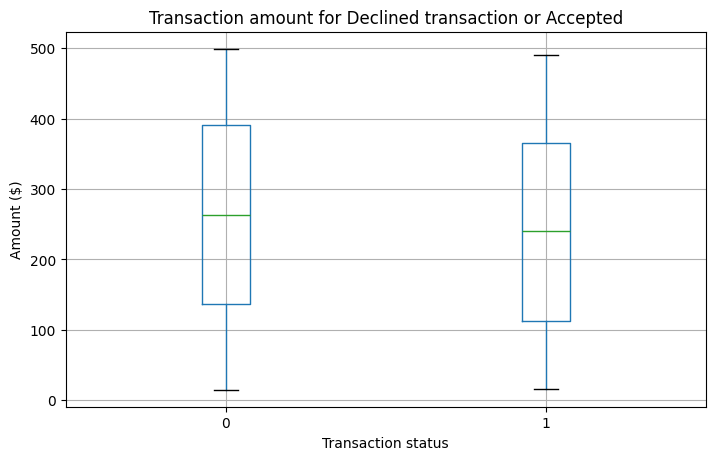

In [ ]:
data["transactions"]["declined"] = data["transactions"]["declined"].astype(str)  # تبدیل به نوع دسته‌بندی
data["transactions"]["amount"] = pd.to_numeric(data["transactions"]["amount"], errors="coerce")

data["transactions"].boxplot(column="amount", by="declined", figsize=(8, 5))

plt.title("Transaction amount for Declined transaction or Accepted")
plt.suptitle("")  # حذف عنوان اضافی
plt.xlabel("Transaction status")
plt.ylabel("Amount ($)")
plt.show()


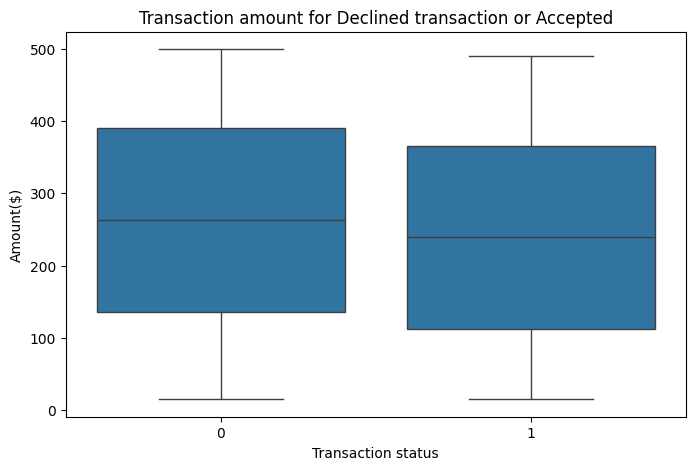

In [ ]:
df=data["transactions"]
plt.figure(figsize=(8, 5))
sns.boxplot(x="declined", y="amount", data=df)
plt.title("Transaction amount for Declined transaction or Accepted")
plt.xlabel("Transaction status")
plt.ylabel("Amount($)")
plt.show()

Level 1- E5:Two categorical variables.


declined        Accepted  Declined
country                           
Canada               265        87
United Kingdom        62         0
United States        173         0


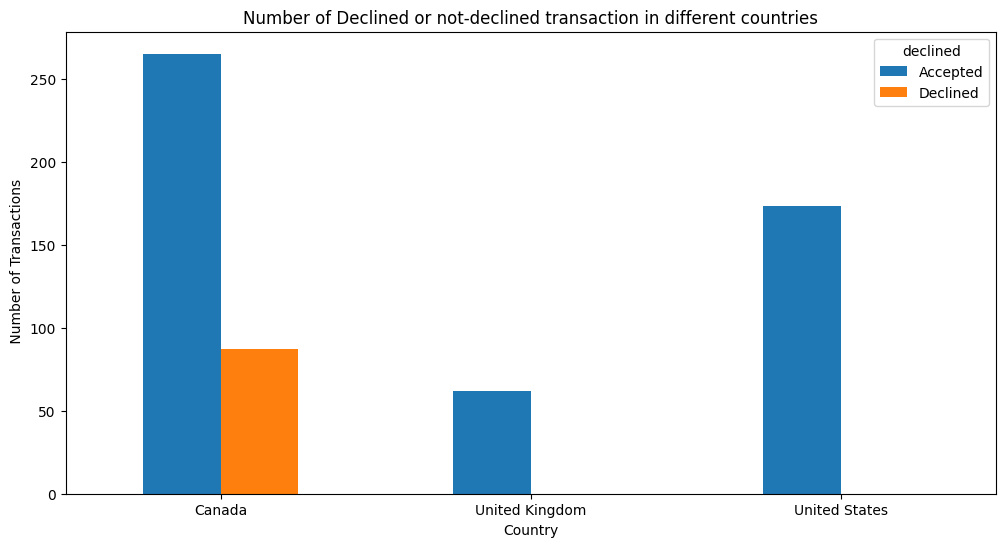

In [69]:

data["transactions"]["declined"] = data["transactions"]["declined"].replace({0: "Accepted", 1: "Declined"})

# گروه‌بندی و محاسبه تعداد تراکنش‌ها
result = data["transactions"].merge(data["users"], left_on="user_id", right_on="id").groupby(["country", "declined"]).size().unstack(fill_value=0)
print(result)
# # رسم نمودار
result.plot(kind="bar", figsize=(12, 6), title="Number of Declined or not-declined transaction in different countries")
plt.xlabel("Country")
plt.ylabel(" Number of Transactions")
plt.xticks(rotation=0)
plt.show()


declined        Accepted  Declined
country                           
Canada                65        10
United Kingdom        44         6
United States        127        23


<Axes: xlabel='country'>

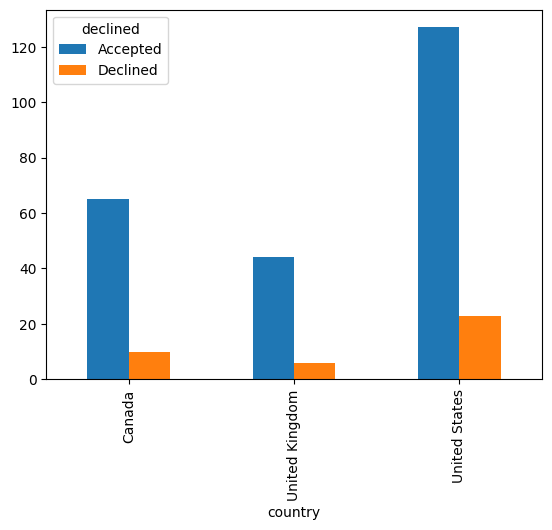

In [67]:

# df_users = data['users']
# merged_df = pd.merge(df_users, df, left_on="id", right_on="user_id")
# pivot_table = merged_df.groupby(["country", "declined"]).size().unstack()
# pivot_table.plot(kind="bar", stacked=True, figsize=(12, 6), title="Number of Declined or not-declined transaction in different countries")
# plt.xlabel("Country")
# plt.ylabel("Number of transaction")
# plt.xticks(rotation=45)
# plt.show()

# Print("*"*20)

crosstab=pd.crosstab(data["users"]["country"],data["transactions"]["declined"])
print(crosstab)
crosstab.plot.bar()

# plt.xlabel("Country")
# plt.ylabel("Number of transaction")
# plt.xticks(rotation=45)
# plt.show()

Level 1- E6:Three variables

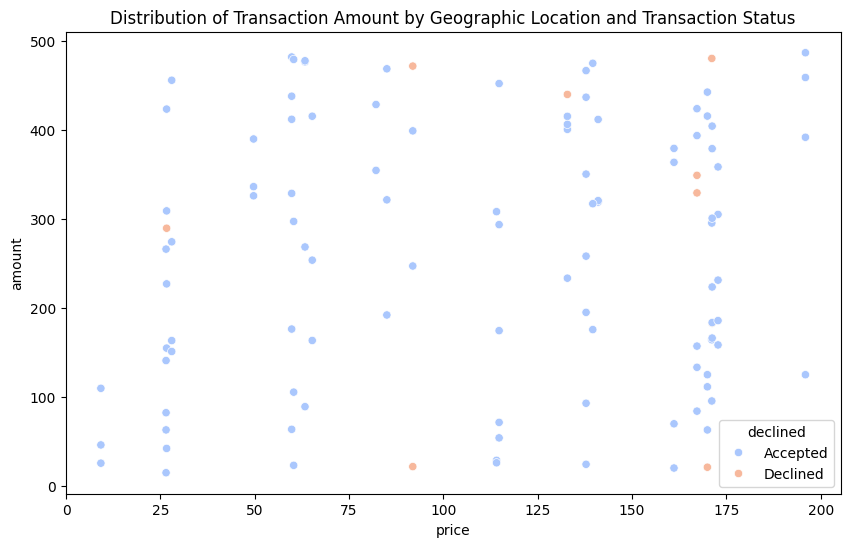

In [70]:

df_merged= data["transactions"].merge(data["products"] ,left_on="product_ids", right_on="id")
df_merged["amount"] = df_merged["amount"].astype(float) #por que hue en seaborn debe ser float!
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="amount", hue="declined", data=df_merged, palette="coolwarm")
plt.title("Distribution of Transaction Amount by Geographic Location and Transaction Status")
plt.show()

In [ ]:
#6. بررسی میانگین مقدار تراکنش نسبت به موقعیت جغرافیایی
print("🔹 میانگین مقدار تراکنش برای هر وضعیت declined:")
print(df.groupby(["declined", "lat"])["amount"].mean())


🔹 میانگین مقدار تراکنش برای هر وضعیت declined:
declined  lat     
0         -89.8248    302.82
          -89.3804     33.40
          -89.2202    266.90
          -89.1290    111.51
          -88.8975    125.11
                       ...  
1          79.3966    109.49
           82.4588    460.38
           82.5384    266.04
           83.6613     21.93
           83.6756    207.09
Name: amount, Length: 587, dtype: float64


Level 1- E7:Graph a Pairplot.


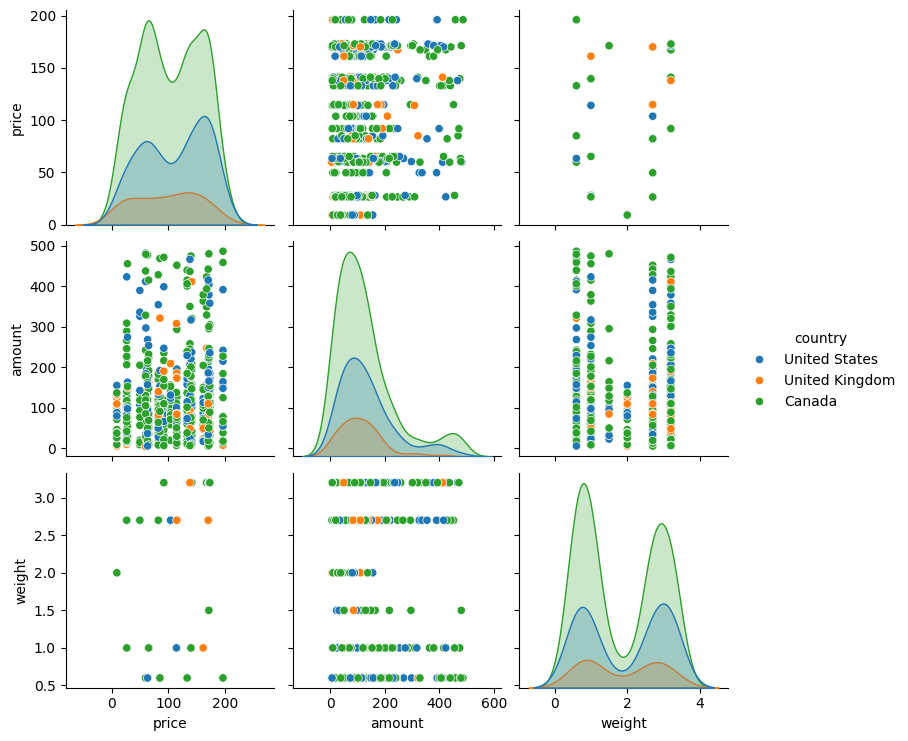

In [74]:

# Merge:
df_merged = df_transactions.merge(data["products"], left_on="product_ids", right_on="id").merge(data["users"], left_on="user_id", right_on="id")
## 7. رسم Pairplot برای بررسی روابط بین متغیرهای عددی
sns.pairplot(df_merged[["price","amount","weight","country"]], hue="country")
plt.show()

Level 2 -Exercise 1
Correlation of all numerical variables.

             amount       lat  longitude     price
amount     1.000000 -0.043671   0.127685  0.111485
lat       -0.043671  1.000000  -0.080889 -0.047506
longitude  0.127685 -0.080889   1.000000  0.075571
price      0.111485 -0.047506   0.075571  1.000000
------------------------------


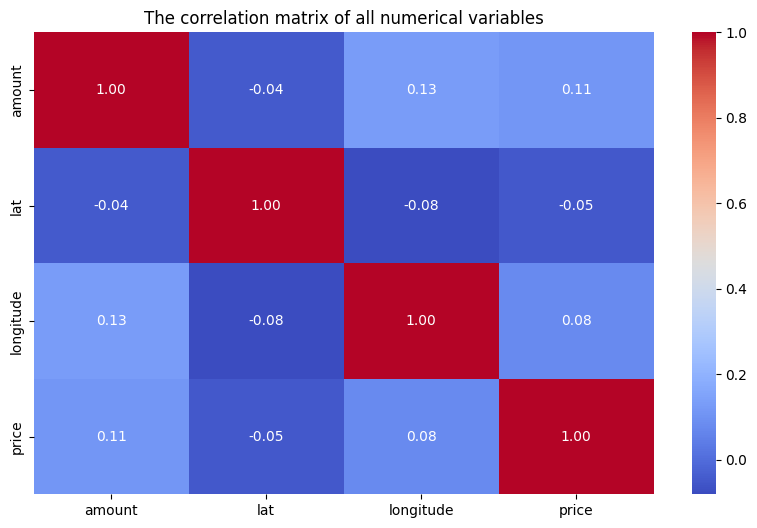

In [ ]:
# مرج کردن جدول transactions با products برای اضافه کردن ستون 'price'
merged_df = data["transactions"].merge(data["products"], left_on="product_ids", right_on="id")

# محاسبه همبستگی بر روی ستون‌های عددی
correlation_matrix = merged_df[['amount', 'lat', 'longitude', 'price']].corr()
print(correlation_matrix)
print("-"*30)
#نمایش ماتریس همبستگی با استفاده از heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("The correlation matrix of all numerical variables")
plt.show()


Level 2- Exercise 2
Implement a jointplot.

<Figure size 800x500 with 0 Axes>

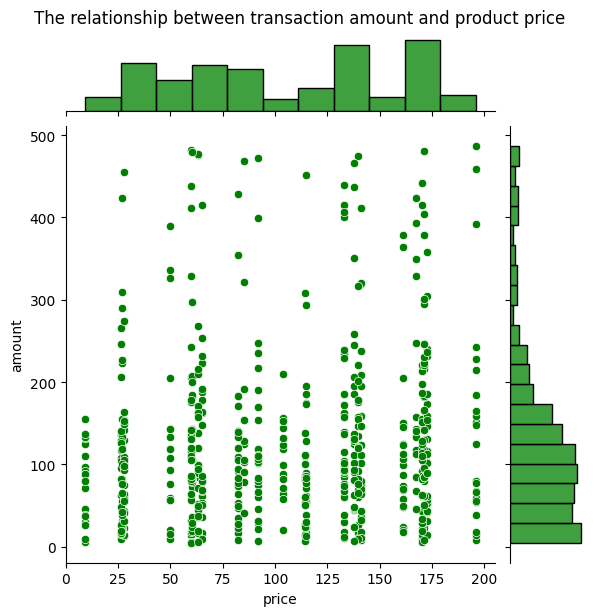

In [ ]:

# jointplot بین مقدار تراکنش و قیمت محصول

df_transactions["product_ids"] = df_transactions["product_ids"].astype(str)
data["products"]["id"] = data["products"]["id"].astype(str)

# Merge:
df_merged = df_transactions.merge(data["products"], left_on="product_ids", right_on="id", suffixes=('_transaction', '_product'))

plt.figure(figsize=(8, 5))
sns.jointplot(x='price', y='amount', data=df_merged, kind='scatter', color='g')
plt.suptitle("The relationship between transaction amount and product price", y=1.02)
plt.show()


Level 3- Exercise 1
Implement a violinplot combined with another type of graph.

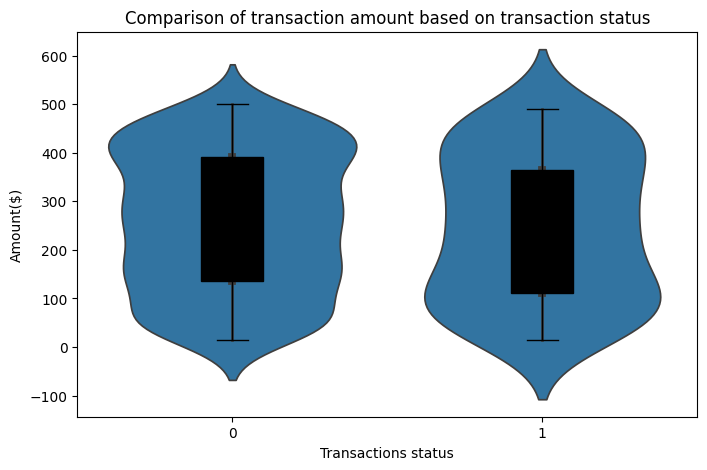

In [ ]:
# اجرای violinplot به همراه boxplot برای مقایسه مقدار تراکنش‌ها بر اساس وضعیت تراکنش
plt.figure(figsize=(8, 5))
sns.violinplot(x="declined", y="amount", data=data["transactions"])
sns.boxplot(x="declined", y="amount", data=data["transactions"], whis=1.5, color="k", width=0.2)
plt.title("Comparison of transaction amount based on transaction status")
plt.xlabel("Transactions status")
plt.ylabel("Amount($)")
plt.show()


In [ ]:
Level 3- Exercise 2
Generates a FacetGrid to visualize multiple aspects of the data simultaneously.

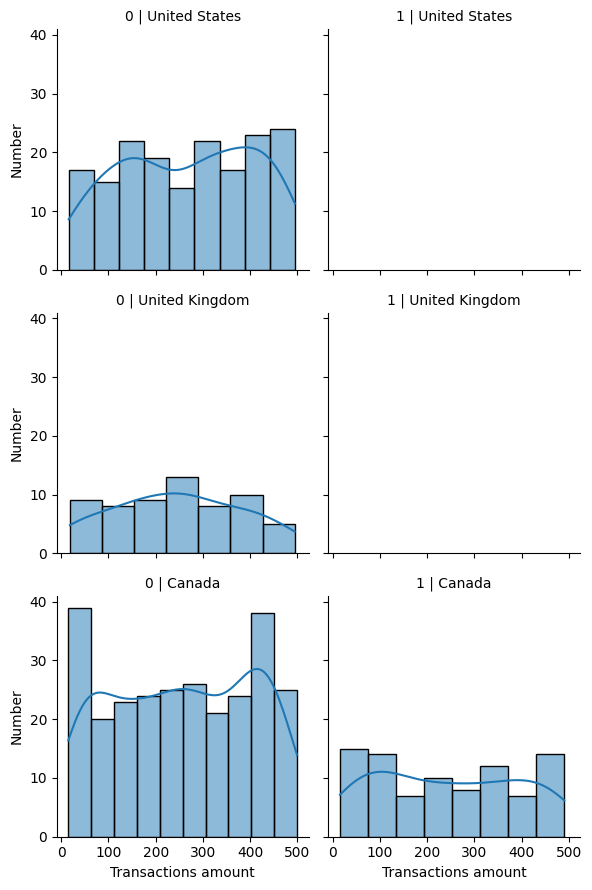

In [ ]:

# ترکیب داده‌ها بر اساس user_id
merged_df = data["transactions"]. merge(data["users"], left_on="user_id", right_on="id")

# ایجاد FacetGrid برای بررسی وضعیت تراکنش در کشورهای مختلف
g = sns.FacetGrid(merged_df, col="declined", row="country", height=3)
g.map(sns.histplot, "amount", kde=True)
g.set_axis_labels("Transactions amount", "Number")
g.set_titles("{col_name} | {row_name}")
plt.show()
